In [1]:
import pandas as pd
import numpy as np
import numba
from numba import jit
import matplotlib.pyplot as plt
%matplotlib notebook

In [27]:
institution_type = pd.read_excel('Institution type.xlsx')

In [144]:
IO = pd.read_csv('13F.csv')

KeyboardInterrupt: 

In [42]:
institution_type.columns = ['mgrno','not useful','permanent key','year','type','classification','permanent classification','style','permanent style','growth style','permanent growth style','tax','extended tax']

In [36]:
IO['year'] = IO['fdate'].apply(lambda x: int(str(x)[:4]))

In [37]:
IO_pre2007 = IO[IO['year'] < 2007]

In [30]:
membership = pd.read_excel('Membership.xlsx')

In [38]:
IO_pre2007_index = pd.Index(IO_pre2007['ticker'].unique())
real_index = pd.Index.intersection(IO_pre2007_index, pd.Index(membership['Ticker'].apply(lambda x: x[:-1]).unique()))
IO_pre2007_russell = IO_pre2007.set_index('ticker').loc[real_index]

In [41]:
IO_pre2007_russell.columns

Index(['fdate', 'mgrname', 'country', 'mgrno', 'typecode', 'rdate', 'prdate',
       'cusip', 'shares', 'sole', 'shared', 'no', 'change', 'stkname',
       'exchcd', 'stkcd', 'indcode', 'stkcdesc', 'prc', 'shrout1', 'shrout2',
       'year'],
      dtype='object')

In [43]:
mgrno_index = pd.Index.intersection(pd.Index(IO_pre2007_russell['mgrno'].unique()),pd.Index(institution_type['mgrno'].unique()))

In [44]:
IO_pre2007_russell = IO_pre2007_russell.reset_index()
IO_pre2007_mgrno_match = IO_pre2007_russell.set_index('mgrno').loc[mgrno_index]

In [45]:
mgrno_group = IO_pre2007_mgrno_match.reset_index().groupby('mgrno')

In [46]:
institution_map = institution_type.groupby('mgrno').first().loc[mgrno_index]['permanent classification']

In [234]:
investor_diff['type'].unique()

array(['DED', 'QIX', 'TRA'], dtype=object)

In [47]:
IO_pre2007_mgrno_match['type'] = institution_map[IO_pre2007_mgrno_match.reset_index()['mgrno']]

In [50]:
group = IO_pre2007_mgrno_match.groupby(['fdate','ticker','type'])

In [105]:
group.sum()['shares'].reset_index().to_csv('different investor.csv')

In [53]:
different_investor_count = group.count()['shares']

Use different investor.csv

In [140]:
investor = pd.read_csv('different investor.csv')

In [8]:
IO.columns

Index(['fdate', 'mgrname', 'country', 'mgrno', 'typecode', 'rdate', 'prdate',
       'cusip', 'shares', 'sole', 'shared', 'no', 'change', 'stkname',
       'ticker', 'exchcd', 'stkcd', 'indcode', 'stkcdesc', 'prc', 'shrout1',
       'shrout2'],
      dtype='object')

In [14]:
group = IO.groupby(['fdate','ticker'])

In [15]:
group.first()

mgrname        country  mgrno  \
fdate    ticker                                                         
20000331 A            AIM MANAGEMENT GROUP,INC.            NaN    140   
         AA              AAL CAPITAL MANAGEMENT            NaN    120   
         AAAB                BESSEMER GROUP INC            NaN   8765   
         AABC                TAUNUS CORPORATION            NaN   7800   
         AAC       AMERICAN GENERAL CORPORATION            NaN   2340   
         AACB                 BARCLAYS BANK PLC            NaN   7900   
         AACE                 BARCLAYS BANK PLC            NaN   7900   
         AAG     AMERICAN MONEY MANAGEMENT CORP            NaN   2010   
         AAG/            AMSOUTH BANCORPORATION            NaN   3880   
         AAGF      HILLIARD LYONS INVT ADVISORY            NaN  44650   
         AAGP                TAUNUS CORPORATION            NaN   7800   
         AAI       MIDAS MANAGEMENT CORPORATION            NaN  57340   
         AAIE             LASALLE NATIONAL BANK            NaN  49980   
         AAII      AMERICAN GENERAL CORPORATION            NaN   2340   
         AAIR      AMERICAN GENERAL CORPORATION            NaN   2340   
         AAM               BANK ONE CORPORATION            NaN   5955   
         AAMB       M & I INVESTMENT MGMT CORP.            NaN  54280   
         AAME                 BARCLAYS BANK PLC            NaN   7900   
         AANB              BANK ONE CORPORATION            NaN   5955   
         AAON                  ADVEST GROUP INC            NaN    485   
         AAP                 TAUNUS CORPORATION            NaN   7800   
         AAPL        A R ASSET MANAGEMENT, INC.            NaN    110   
         AAPT    LEGG MASON FUND ADVISORS, INC.            NaN  50160   
         AAS          AIM MANAGEMENT GROUP,INC.            NaN    140   
         AASA    LEGG MASON FUND ADVISORS, INC.            NaN  50160   
         AASI                TAUNUS CORPORATION            NaN   7800   
         AASP         ZIONS FIRST NATIONAL BANK            NaN  94800   
         AASR     CAMDEN ASSET MANAGEMENT, L.P.            NaN  12180   
         AAT             ASSET ADVR CORPORATION            NaN   4725   
         AATK                 BARCLAYS BANK PLC            NaN   7900   
...                                         ...            ...    ...   
20180630 YLCO                     VERITABLE, LP  UNITED STATES  10313   
         YLD              JANE STR HOLDING, LLC  UNITED STATES  10736   
         YLDE       SUSQUEHANNA INTL GROUP, LLP  UNITED STATES  12116   
         YMLI             JANE STR HOLDING, LLC  UNITED STATES  10736   
         YMLP     PINKERTON RET SPECIALISTS LLC  UNITED STATES   8906   
         YORW    MCKINLEY CARTER WEALTH SERV IN  UNITED STATES  12513   
         YPF      BARING ASSET MANAGEMENT, LLC.  UNITED STATES   7930   
         YRI                   SPOT TRADING LLC  UNITED STATES  12641   
         YUEI    PARAMETRIC PORTFOLIO ASSOC LLC  UNITED STATES  67839   
         YUII     POPE ASSET MANAGEMENT, L.L.C.  UNITED STATES   6032   
         YUM     AMERICAFIRST CAPITAL MGMT, LLC  UNITED STATES   8924   
         YXI           BNP PARIBAS ARBITRAGE SA  UNITED STATES   6093   
         YYY                 BARTLETT & COMPANY  UNITED STATES   8140   
         YZC     PARAMETRIC PORTFOLIO ASSOC LLC  UNITED STATES  67839   
         ZAGG      MADISON SQUARE INVESTORS LLC  UNITED STATES  12299   
         ZBH                   SPOT TRADING LLC  UNITED STATES  12641   
         ZBIO              SIMPLEX TRADING, LLC  UNITED STATES   9183   
         ZBRA    WEAVER C.BARKSDALE& ASSOC INC.  UNITED STATES  10306   
         ZBpA    LAFLEUR&GODFREY INC.INV COUNSE  UNITED STATES  11464   
         ZEUS             WE ARE ONE SEVEN, LLC  UNITED STATES  21865   
         ZION    NEUBERGER BERMAN BRETON HILL U         CANADA  13451   
         ZIOP                  SPOT TRADING LLC  UNITED STATES  12641   
         ZIXI    HAUCK&AU

In [142]:
investor_index = investor.set_index(['fdate','ticker'])
investor_index['total_shares'] = group.first()['shrout1']*1000000

NameError: name 'group' is not defined

In [141]:
execucomp_panel = pd.read_excel('execucomp_panel.xlsx')

In [63]:
investor_index = investor_index.reset_index().set_index(['fdate','ticker','type'])
investor_index['count'] = different_investor_count.reset_index().set_index(['fdate','ticker','type'])['shares']

In [165]:
investor_diff = investor_index.reset_index()

In [166]:
from dateutil.parser import parse
investor_diff['fdate'] = investor_diff['fdate'].apply(lambda x: parse(str(x)))

In [167]:
investor_diff['quarter']=investor_diff['fdate'].apply(lambda x: x.quarter)

In [168]:
investor_diff['year'] = investor_diff['fdate'].apply(lambda x:x.year)

In [104]:
investor_diff = investor_diff.set_index(['year','ticker'])

In [108]:
execucomp_panel = execucomp_panel.set_index(['year','tic'])

In [114]:
investor_diff[['Mktcap_may','Rank','R1000']] = execucomp_panel[['Mktcap_may','Rank','R1000']]

In [169]:
investor_diff['percent'] = investor_diff['shares'] / investor_diff['total_shares']

KeyError: 'total_shares'

In [11]:
import statsmodels.formula.api as smf

In [259]:
investor_diff['Percent'] = investor_diff['percent']*100
investor_diff_rankinrange = investor_diff.set_index('Rank').loc[range(700,1300)].reset_index()
investor_diff_rankinrange['year'] = investor_diff_rankinrange['fdate'].apply(lambda x: x.year)
investor_diff_rankinrange['T'] = investor_diff_rankinrange['Rank'] > 1000
investor_diff_rankinrange['Rank1000'] = investor_diff_rankinrange['Rank'] - 1000

In [260]:
result_list = []

for i in [2,3,4]:
    result_list.append(smf.ols('count ~ T + Rank + T*Rank + C(year)', data = investor_diff_rankinrange.groupby(['type','quarter']).get_group(('DED',i))).fit())
                       
investor_diff_rankinrange = investor_diff.set_index('Rank').loc[range(800,1200)].reset_index()
investor_diff_rankinrange['year'] = investor_diff_rankinrange['fdate'].apply(lambda x: x.year)
investor_diff_rankinrange['T'] = investor_diff_rankinrange['Rank'] > 1000
investor_diff_rankinrange['Rank1000'] = investor_diff_rankinrange['Rank'] - 1000
                       
for i in [2,3,4]:
    result_list.append(smf.ols('count ~ T + Rank + T*Rank + C(year)', data = investor_diff_rankinrange.groupby(['type','quarter']).get_group(('DED',i))).fit())


In [261]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=result_list,
                            float_format='%0.3f',
                            stars = True,
                            model_names=['Quarter 2','Quarter 3',
                                         'Quarter 4','Quarter 2',
                                         'Quarter 3','Quarter 4'],
                            info_dict=info_dict,
                            regressor_order=['contant',
                                             'T',
                                             'Rank',
                                            'T*Rank'])

In [262]:
print(results_table)


                 Quarter 2 I Quarter 3 I Quarter 4 I Quarter 2 II Quarter 3 II Quarter 4 II
-------------------------------------------------------------------------------------------
Rank             -0.001***   -0.002***   -0.001***   -0.002**     -0.002***    -0.002**    
                 (0.000)     (0.000)     (0.000)     (0.001)      (0.001)      (0.001)     
C(year)[T.2001]  0.415***    -0.081      -0.175**    0.402***     -0.117       -0.245**    
                 (0.086)     (0.084)     (0.083)     (0.106)      (0.104)      (0.103)     
C(year)[T.2002]  -0.223***   -0.395***   -0.384***   -0.331***    -0.484***    -0.502***   
                 (0.086)     (0.084)     (0.083)     (0.105)      (0.103)      (0.102)     
C(year)[T.2003]  -0.386***   -0.471***   -0.505***   -0.419***    -0.493***    -0.521***   
                 (0.085)     (0.083)     (0.082)     (0.105)      (0.102)      (0.101)     
C(year)[T.2004]  -0.360***   -0.322***   -0.278***   -0.413***    -0.355***    

In [139]:
temp = investor_diff_rankinrange.set_index('Rank')
temp = temp[temp['quarter'] == 2]
temp = temp.reset_index()
temp['QIX_percent'] = temp[temp['type'] == 'QIX']['Percent']
temp['DED_percent'] = temp[temp['type'] == 'DED']['Percent']
temp['TRA_percent'] = temp[temp['type'] == 'TRA']['Percent']
temp['QIX_count'] = temp[temp['type'] == 'QIX']['count']
temp['DED_count'] = temp[temp['type'] == 'DED']['count']
temp['TRA_count'] = temp[temp['type'] == 'TRA']['count']


NameError: name 'investor_diff_rankinrange' is not defined

In [157]:
temp = execucomp_panel[execucomp_panel['year'] < 2007]
temp['quarter'] = temp['datadate'].apply(lambda x: parse(str(x))).apply(lambda x: x.quarter)

C:\Users\barry\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [159]:
temp = temp[temp['quarter'] == 2]

Text(0, 0.5, 'IO_count')

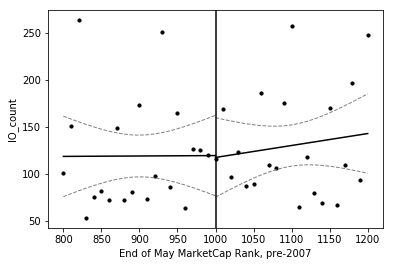

In [161]:
from statsmodels.stats.outliers_influence import summary_table

start = 800
end = 1200
middle = (start+end)/2

name = 'IO_count'
IO_pre2007 = temp.groupby(np.arange(len(temp)) // 10).mean().loc[start/10:end/10]
IO_pre2007['rank'] = IO_pre2007.index*10
IO_pre2007 = IO_pre2007.set_index('rank')


model1 = smf.ols(name + ' ~ rank', data = IO_pre2007.loc[start:middle].reset_index()).fit()
coef1 = model1.params.values
model2 = smf.ols(name + ' ~ rank', data = IO_pre2007.loc[middle:end].reset_index()).fit()
coef2 = model2.params.values
IO_pre2007.reset_index().plot.scatter(x = 'rank', y = name, s = 10, c='k')
fit_pre = (IO_pre2007.loc[start:middle].reset_index()['rank']*coef1[1]+coef1[0]).values
fit_post = (IO_pre2007.loc[middle:end].reset_index()['rank']*coef2[1]+coef2[0]).values

x_pre = np.arange(start,middle + 10,10)
x_post = np.arange(middle,end+10,10)
plt.plot(x_pre,fit_pre,color='k')
st, data, ss2 = summary_table(model1, alpha=0.1)
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
plt.plot(x_pre, predict_mean_ci_low, '--', lw=1,color='grey')
plt.plot(x_pre, predict_mean_ci_upp, '--', lw=1,color='grey')


plt.plot(x_post,fit_post,color = 'k')
st, data, ss2 = summary_table(model2, alpha=0.1)
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
plt.plot(x_post, predict_mean_ci_low, '--', lw=1, color='grey')
plt.plot(x_post, predict_mean_ci_upp, '--', lw=1,color='grey')
plt.axvline(middle, color='k')
plt.xlabel('End of May MarketCap Rank, pre-2007')
plt.ylabel(name)

In [312]:
investor_diff_rankinrange_q2.set_index('Rank').loc[980:1005].groupby('type').get_group('QIX')['Percent'].mean()

50.31249392169413

In [313]:
investor_diff_rankinrange_q2.set_index('Rank').loc[980:1000].groupby('type').get_group('QIX')['Percent'].std()

19.53398606227857

In [322]:
investor_diff_rankinrange_q2.set_index('Rank').loc[1005:1015].groupby('type').get_group('QIX')['Percent'].mean()

44.81309647028399

In [311]:
investor_diff_rankinrange_q2 = investor_diff_rankinrange[investor_diff_rankinrange['quarter'] == 2]

In [327]:
investor_diff_rankinrange_q2['QIX_percent'] = investor_diff_rankinrange_q2[investor_diff_rankinrange_q2['type'] == 'QIX']['Percent']
investor_diff_rankinrange_q2['DED_percent'] = investor_diff_rankinrange_q2[investor_diff_rankinrange_q2['type'] == 'DED']['Percent']
investor_diff_rankinrange_q2['TRA_percent'] = investor_diff_rankinrange_q2[investor_diff_rankinrange_q2['type'] == 'TRA']['Percent']
investor_diff_rankinrange_q2['QIX_count'] = investor_diff_rankinrange_q2[investor_diff_rankinrange_q2['type'] == 'QIX']['count']
investor_diff_rankinrange_q2['DED_count'] = investor_diff_rankinrange_q2[investor_diff_rankinrange_q2['type'] == 'DED']['count']
investor_diff_rankinrange_q2['TRA_count'] = investor_diff_rankinrange_q2[investor_diff_rankinrange_q2['type'] == 'TRA']['count']

C:\Users\barry\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\barry\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\barry\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [395]:
execucomp_panel = execucomp_panel.set_index(['year','tic'])

In [164]:
execucomp_panel['QIX_percent'] = investor_diff.groupby('quarter').get_group(2).groupby('type').get_group('QIX')['Percent']
execucomp_panel['QIX_count'] = investor_diff.groupby('quarter').get_group(2).groupby('type').get_group('QIX')['count']
execucomp_panel['TRA_percent'] = investor_diff.groupby('quarter').get_group(2).groupby('type').get_group('TRA')['Percent']
execucomp_panel['TRA_count'] = investor_diff.groupby('quarter').get_group(2).groupby('type').get_group('TRA')['count']
execucomp_panel['DED_percent'] = investor_diff.groupby('quarter').get_group(2).groupby('type').get_group('DED')['Percent']
execucomp_panel['DED_count'] = investor_diff.groupby('quarter').get_group(2).groupby('type').get_group('DED')['count']

NameError: name 'investor_diff' is not defined

In [163]:
from linearmodels.iv import IV2SLS

In [5]:
def update_num(panel, name,loc, num):
    panel = panel.set_index('Rank')
    panel.loc[range(loc-5,loc+5), name] = num
    return panel.reset_index()

In [7]:
execucomp_panel['salary_share'] = execucomp_panel['salary'] / execucomp_panel['TDC1']*100
execucomp_panel['bonus_share'] = execucomp_panel['bonus'] / execucomp_panel['TDC1']*100
execucomp_panel['stock_share'] = execucomp_panel['Stock_award'] / execucomp_panel['TDC1']*100
execucomp_panel['option_share'] = execucomp_panel['Option_award'] / execucomp_panel['TDC1']*100
execucomp_panel['LTIP_share'] = execucomp_panel['LTIP'] / execucomp_panel['TDC1']*100
execucomp_panel['Other_share'] = execucomp_panel['Other'] / execucomp_panel['TDC1']*100

In [36]:
execucomp_panel = execucomp_panel.set_index('Rank').loc[range(800,1200)].reset_index()
execucomp_panel = execucomp_panel[execucomp_panel['fyear'] < 2007]

In [455]:
execucomp_panel['constant'] = 1
execucomp_panel['LogMktcap'] = np.log(execucomp_panel['mktcap'])
execucomp_panel['LogMktcap_may'] = np.log(execucomp_panel['Mktcap_may'])

Y_variable = ['TDC1']
x_list = ['QIX_percent']
reg_list = []
for Y in Y_variable:
    for x in x_list:
        IV = IV2SLS(dependent= execucomp_panel[Y],
                exog = execucomp_panel['constant'],
                endog = execucomp_panel[x],
                instruments = execucomp_panel[['T','Rank']]).fit(cov_type='unadjusted')
        reg_list.append(IV)

C:\Users\barry\Anaconda3\lib\site-packages\linearmodels\utility.py:476: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [456]:
reg_list

[                          IV-2SLS Estimation Summary                          
 Dep. Variable:                   TDC1   R-squared:                     -2.9830
 Estimator:                    IV-2SLS   Adj. R-squared:                -2.9857
 No. Observations:                1484   F-statistic:                    1.8462
 Date:                Mon, Apr 15 2019   P-value (F-stat)                0.1742
 Time:                        21:05:23   Distribution:                  chi2(1)
 Cov. Estimator:            unadjusted                                         
                                                                               
                               Parameter Estimates                              
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
 -------------------------------------------------------------------------------
 constant        9875.2     6019.1     1.6406     0.1009     -1922.1   2.167e+04
 QIX_percent    -161.17     118.62  

In [441]:
execucomp_panel['T'] = execucomp_panel['Rank'] > 1000

In [445]:
result = pd.DataFrame(index = ['QIX_count','QIX_countstd'])
for (i,y) in enumerate(Y_variable):
    std = reg_list[i].std_errors.round(2).reset_index()
    std.index = std['index'].apply(lambda x: x+'std')
    std = std['stderr'].astype(str).apply(lambda x: '(' + x + ')')
    result[y] = reg_list[i].params.round(2).append(std)
    result[y]['No. observations'] = reg_list[i].nobs
    result[y]['R-squared'] = np.abs(np.round(reg_list[i].rsquared,2))

In [446]:
print(result.to_latex())

\begin{tabular}{lllllll}
\toprule
{} & salary\_share & bonus\_share & stock\_share & option\_share & LTIP\_share & Other\_share \\
\midrule
QIX\_count    &        -0.17 &        0.08 &       -1.05 &        -0.45 &       0.04 &        0.02 \\
QIX\_countstd &       (0.05) &      (0.05) &      (0.21) &       (0.21) &     (0.02) &      (0.02) \\
\bottomrule
\end{tabular}



In [448]:
boardex_panel = boardex_panel.set_index(['year','tic'])

In [449]:
boardex_panel['QIX_percent'] = investor_diff.groupby('quarter').get_group(2).groupby('type').get_group('QIX')['Percent']
boardex_panel['QIX_count'] = investor_diff.groupby('quarter').get_group(2).groupby('type').get_group('QIX')['count']
boardex_panel['TRA_percent'] = investor_diff.groupby('quarter').get_group(2).groupby('type').get_group('TRA')['Percent']
boardex_panel['TRA_count'] = investor_diff.groupby('quarter').get_group(2).groupby('type').get_group('TRA')['count']
boardex_panel['DED_percent'] = investor_diff.groupby('quarter').get_group(2).groupby('type').get_group('DED')['Percent']
boardex_panel['DED_count'] = investor_diff.groupby('quarter').get_group(2).groupby('type').get_group('DED')['count']

In [479]:
boardex_panel['salary_share'] = boardex_panel['Salary'] / boardex_panel['Total']*100
boardex_panel['bonus_share'] = boardex_panel['Bonus'] / boardex_panel['Total']*100
boardex_panel['option_share'] = boardex_panel['Option'] / boardex_panel['Total']/10
boardex_panel['LTIP_share'] = boardex_panel['LTIP'] / boardex_panel['Total']/10


In [117]:
boardex_panel = boardex_panel.loc[:2007][boardex_panel.loc[:2007]['Rank'].apply(lambda x: all([x<1200,x>800]))]

In [162]:
boardex_panel['constant'] = 1
boardex_panel['LogMktcap'] = np.log(boardex_panel['mktcap'])
boardex_panel['LogMktcap_may'] = np.log(boardex_panel['Mktcap_may'])
boardex_panel['T'] = boardex_panel['Rank'] > 1000
Y_variable = ['salary_share','bonus_share','option_share','LTIP_share']
x_list = ['QIX_count']
reg_list = []
for Y in Y_variable:
    for x in x_list:
        IV = IV2SLS(dependent= boardex_panel[Y],
                exog = boardex_panel['constant'],
                endog = boardex_panel[x],
                instruments = boardex_panel[['T','Rank']]).fit(cov_type='unadjusted')
        reg_list.append(IV)

NameError: name 'IV2SLS' is not defined

In [485]:
reg_list

[                          IV-2SLS Estimation Summary                          
 Dep. Variable:           salary_share   R-squared:                      0.0039
 Estimator:                    IV-2SLS   Adj. R-squared:                 0.0020
 No. Observations:                 525   F-statistic:                    0.1814
 Date:                Mon, Apr 15 2019   P-value (F-stat)                0.6702
 Time:                        21:16:52   Distribution:                  chi2(1)
 Cov. Estimator:            unadjusted                                         
                                                                               
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
 ------------------------------------------------------------------------------
 constant       70.566     9.8432     7.1690     0.0000      51.273      89.858
 QIX_count     -0.0429     0.1008    -0.

In [486]:
result = pd.DataFrame(index = ['QIX_count','QIX_countstd'])
for (i,y) in enumerate(Y_variable):
    std = reg_list[i].std_errors.round(2).reset_index()
    std.index = std['index'].apply(lambda x: x+'std')
    std = std['stderr'].astype(str).apply(lambda x: '(' + x + ')')
    result[y] = reg_list[i].params.round(2).append(std)
    result[y]['No. observations'] = reg_list[i].nobs
    result[y]['R-squared'] = np.abs(np.round(reg_list[i].rsquared,2))

In [487]:
print(result.to_latex())

\begin{tabular}{lllll}
\toprule
{} & salary\_share & bonus\_share & option\_share & LTIP\_share \\
\midrule
QIX\_count    &        -0.04 &         1.5 &         0.17 &       0.02 \\
QIX\_countstd &        (0.1) &      (0.76) &       (0.06) &     (0.01) \\
\bottomrule
\end{tabular}



In [490]:
IO_sum = pd.read_excel('IO_output.xlsx')

In [492]:
execucomp_panel

,Rank,Unnamed: 0,datadate,fyear,csho,ni,revt,prcc_f,mktcap,IO_percent,...,salary_share,bonus_share,stock_share,option_share,LTIP_share,Other_share,constant,LogMktcap,LogMktcap_may,T
0,800.0,5243,20011231,2001,191.493,-0.589100,18.799100,55.3800,1.060488e+07,15.812357,...,64.233947,15.259868,NaN,NaN,0.000000,0.990170,1,16.176825,14.309180,False
1,800.0,9055,20021231,2002,51.731,0.073847,0.661750,36.0500,1.864903e+06,86.488009,...,15.893034,28.984846,NaN,NaN,0.000000,1.232551,1,14.438719,14.285052,False
2,800.0,12354,20030630,2003,27.293,0.051256,0.247539,56.7000,1.547513e+06,NaN,...,21.621372,21.227745,NaN,NaN,0.000000,0.153782,1,14.252160,14.220800,False
3,800.0,16628,20041231,2004,57.752,0.081700,2.407200,34.3600,1.984359e+06,81.259592,...,18.195161,13.596635,NaN,NaN,0.000000,23.191133,1,14.500806,14.485976,False
4,800.0,17752,20050930,2005,41.702,0.262524,4.995353,58.6700,2.446656e+06,NaN,...,12.457912,61.560630,NaN,NaN,0.000000,6.017024,1,14.710233,14.613611,False
5,800.0,22099,20061231,2006,173.648,0.185527,1.014382,16.7000,2.899922e+06,18.048007,...,53.973868,2.075904,0.000000,6.605845,NaN,11.661566,1,14.880194,14.767344,False
17,801.0,1402,20001231,2000,64.686,0.081886,0.960773,23.6875,1.532250e+06,46.234774,...,42.743999,25.790806,NaN,NaN,0.000000,0.886199,1,14.242248,14.338548,False
18,801.0,6298,20020131,2001,143.989,0.000322,6.070568,10.0800,1.451409e+06,51.726892,...,25.859061,7.462029,NaN,NaN,0.000000,1.600113,1,14.188045,14.308648,False
19,801.0,8381,20021231,2002,40.539,0.090106,1.976732,31.8900,1.292789e+06,50.849923,...,38.130473,15.107429,NaN,NaN,0.000000,1.313894,1,14.072312,14.284782,False
20,801.0,12608,20031231,2003,63.405,0.070413,0.661897,22.8500,1.448804e+06,15.885229,...,NaN,NaN,NaN,NaN,NaN,NaN,1,14.186249,14.219294,False


In [511]:
execucomp_panel['Rank1000'] = execucomp_panel['Rank'] - 1000

In [584]:
model = smf.ols('R1000 ~ Rank1000 + T + Rank1000*T + C(fyear)', data = execucomp_panel).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  R1000   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     404.0
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:25:12   Log-Likelihood:                -270.24
No. Observations:                2048   AIC:                             560.5
Df Residuals:                    2038   BIC:                             616.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1734      0.023     -7.482      0.000      -0.219      -0.128
T[T.True]              0.1264      0.024      5.188      0.000       0.079       0.174
C(fyear)[T.2001]       0.0376      0.023      1.599      0.110      -0.009       0.084
C(fyear)[T.2002]       0.1175      0.023      5.053      0.000       0.072       0.163
C(fyear)[T.2003]       0.1461      0.023      6.270      0.000       0.100       0.192
C(fyear)[T.2004]       0.1401      0.023      5.978      0.000       0.094       0.186
C(fyear)[T.2005]       0.1736      0.023      7.450      0.000       0.128       0.219
C(fyear)[T.2006]       0.2151      0.023      9.263      0.000       0.170       0.261
Rank1000              -0.0062      0.000    -41.507      0.000      -0.006      -0.006
Rank1000:T[T.True]     0.0059      0.000     27.939      0.000       0.006       0.006
==============================================================================
Omnibus:                      482.278   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1510.484
Skew:                           1.177   Prob(JB):                         0.00
Kurtosis:                       6.487   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [515]:
import os
from os import listdir
from os.path import isfile, join
R1000_file = './russell/1000'
R2000_file = './russell/2000'
import matplotlib.pyplot as plt
%matplotlib notebook

In [517]:
R1000_filename= os.listdir(R1000_file)
R2000_filename=os.listdir(R2000_file)

In [525]:
R1000_list = pd.DataFrame(columns = ['Year','Ticker','Price'])
for file in R1000_filename:
    temp = pd.read_excel(os.path.join(os.getcwd(), R1000_file, file))
    temp = temp[['Ticker','Price']]
    temp['Ticker'] = temp['Ticker'].apply(lambda x: x[:-9])
    temp['Year'] = file[-10:-6]
    R1000_list = R1000_list.append(temp, ignore_index = True)
    
R2000_list = pd.DataFrame(columns = ['Year','Ticker','Price'])
for file in R2000_filename:
    temp = pd.read_excel(os.path.join(os.getcwd(), R2000_file, file))
    temp = temp[['Ticker','Price']]
    temp['Ticker'] = temp['Ticker'].apply(lambda x: x[:-9])
    temp['Year'] = file[-10:-6]
    R2000_list = R2000_list.append(temp, ignore_index = True)
    
R2000_list['Membership'] = 'R2000'
R1000_list['Membership'] = 'R1000'

Russell_all = R1000_list.append(R2000_list, ignore_index = True)

In [541]:
mktcap_may = pd.read_excel('MktCap_may.xlsx')


In [552]:
Russell_all['year'] = Russell_all['Year'].apply(lambda x: parse(x).year)
Russell_all['year'] = Russell_all['year'].astype(int)
mktcap_may = mktcap_may.groupby(['TICKER','Year']).first()
#Russell_all['Ticker'] = Russell_all['Ticker'].apply(lambda x: x[:-1])

In [558]:
mktcap_may['R2000'] = Russell_all.groupby(['Ticker','year']).first()['R2000']

In [566]:
mktcap_may['T'] = mktcap_may['Rank'] > 1000
mktcap_may['Rank1000'] = mktcap_may['Rank'] - 1000

In [610]:
#mktcap_may_pre2007 = mktcap_may.reset_index()[mktcap_may.reset_index()['Year'] < 2007]
#mktcap_may_pre2007 = mktcap_may_pre2007.dropna()
model = smf.ols('R2000 ~ Rank1000 + T + Rank1000*T + C(Year)', data = mktcap_may_pre2007).fit()


In [611]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  R2000   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     8179.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:31:53   Log-Likelihood:                 3216.4
No. Observations:               14537   AIC:                            -6413.
Df Residuals:                   14527   BIC:                            -6337.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3553      0.007     52.903      0.000       0.342       0.368
T[T.True]              0.6511      0.006    100.466      0.000       0.638       0.664
C(Year)[T.2001]       -0.0071      0.006     -1.116      0.265      -0.019       0.005
C(Year)[T.2002]       -0.0154      0.006     -2.461      0.014      -0.028      -0.003
C(Year)[T.2003]       -0.0227      0.006     -3.657      0.000      -0.035      -0.011
C(Year)[T.2004]       -0.0199      0.006     -3.215      0.001      -0.032      -0.008
C(Year)[T.2005]       -0.0252      0.006     -4.090      0.000      -0.037      -0.013
C(Year)[T.2006]       -0.0326      0.006     -5.324      0.000      -0.045      -0.021
Rank1000               0.0005   9.01e-06     53.616      0.000       0.000       0.001
Rank1000:T[T.True]    -0.0005    9.8e-06    -50.312      0.000      -0.001      -0.000
==============================================================================
Omnibus:                     2828.021   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83703.220
Skew:                          -0.160   Prob(JB):                         0.00
Kurtosis:                      14.751   Cond. No.                     9.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [603]:
mktcap_may_pre2007['R2000'] = mktcap_may_pre2007['R2000'].astype(int)

In [600]:
mktcap_may_pre2007.dtypes

TICKER         object
Year            int64
Unnamed: 0      int64
MarketCap     float64
Rank          float64
R2000           int32
T                bool
Rank1000      float64
dtype: object

In [71]:
execucomp_panel = update_num(execucomp_panel,'Stock_award',880,500)
execucomp_panel = update_num(execucomp_panel,'Stock_award',980,500)
execucomp_panel = update_num(execucomp_panel,'Stock_award',990,500)
execucomp_panel = update_num(execucomp_panel,'Stock_award',1010,400)
execucomp_panel = update_num(execucomp_panel,'Stock_award',1020,400)
execucomp_panel = update_num(execucomp_panel,'Stock_award',1030,500)
execucomp_panel = update_num(execucomp_panel,'Stock_award',1040,300)
execucomp_panel = update_num(execucomp_panel,'Stock_award',1060,400)

execucomp_panel = update_num(execucomp_panel,'bonus',990,600)
execucomp_panel = update_num(execucomp_panel,'bonus',980,500)
execucomp_panel = update_num(execucomp_panel,'bonus',970,400)

execucomp_panel = update_num(execucomp_panel,'bonus',1010,100)
execucomp_panel = update_num(execucomp_panel,'bonus',1020,200)
execucomp_panel = update_num(execucomp_panel,'bonus',1030,300)
execucomp_panel = update_num(execucomp_panel,'bonus',1040,400)

In [33]:
execucomp_panel['T'] = execucomp_panel['Rank'] > 1000
execucomp_panel['Rank1000'] = execucomp_panel['Rank'] - 1000

In [85]:
execucomp_panel['salary_share'] = execucomp_panel['salary'] / execucomp_panel['TDC1']*100
execucomp_panel['bonus_share'] = execucomp_panel['bonus'] / execucomp_panel['TDC1']*100
execucomp_panel['stock_share'] = execucomp_panel['Stock_award'] / execucomp_panel['TDC1']*100
execucomp_panel['option_share'] = execucomp_panel['Option_award'] / execucomp_panel['TDC1']*100
execucomp_panel['LTIP_share'] = execucomp_panel['LTIP'] / execucomp_panel['TDC1']*100
execucomp_panel['Other_share'] = execucomp_panel['Other'] / execucomp_panel['TDC1']*100

In [89]:
model = smf.ols('Stock_award ~ T + Rank1000 + T*Rank1000', data = execucomp_panel)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Stock_award   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     7.117
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           0.000106
Time:                        15:15:19   Log-Likelihood:                -4042.2
No. Observations:                 586   AIC:                             8092.
Df Residuals:                     582   BIC:                             8110.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            491.5791     24.057     20.434      0.000     444.331     538.827
T[T.True]            -70.9544     30.962     -2.292      0.022    -131.765     -10.143
Rank1000               0.3930      0.251      1.563      0.119      -0.101       0.887
T[T.True]:Rank1000    -1.0541      0.385     -2.735      0.006      -1.811      -0.297
==============================================================================
Omnibus:                      457.298   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12159.660
Skew:                           3.192   Prob(JB):                         0.00
Kurtosis:                      24.384   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
result_list = []
for name in ['salary_share','bonus_share','stock_share','option_share','LTIP_share','Other_share']:
    
    
    model = smf.ols(name + ' ~ T + Rank1000 + T*Rank1000', data = execucomp_panel)
    result_list.append(model.fit())
    


from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: f"{x.rsquared:.3f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=result_list,
                            float_format='%0.3f',
                            stars = True,
                            info_dict=info_dict,
                            regressor_order=['contant',
                                             'T',
                                             'Rank',
                                            'T*Rank'])



                   salary_share bonus_share stock_share option_share LTIP_share Other_share
-------------------------------------------------------------------------------------------
Intercept          29.237***    31.019***   43.006***   21.470***    0.654      5.321***   
                   (1.221)      (1.431)     (3.568)     (5.341)      (0.545)    (0.569)    
Rank1000           0.013        0.089***    0.118***    0.032        -0.014***  0.001      
                   (0.010)      (0.012)     (0.036)     (0.044)      (0.005)    (0.005)    
T[T.True]          2.241        -9.445***   0.086       -8.135       1.077      -0.071     
                   (1.728)      (2.025)     (4.614)     (8.216)      (0.763)    (0.805)    
T[T.True]:Rank1000 -0.026*      -0.121***   -0.257***   0.068        0.013**    -0.005     
                   (0.015)      (0.018)     (0.053)     (0.069)      (0.007)    (0.007)    
R-squared          0.006        0.046       0.049       0.032        0.007     

In [129]:
boardex_panel = pd.read_excel('boardex_panel.xlsx')

In [87]:
result_list = []
for name in ['salary_share','bonus_share','stock_share','option_share','LTIP_share','Other_share']:
    
    
    model = smf.ols(name + ' ~ T + Rank1000 + T*Rank1000', data = execucomp_panel)
    result_list.append(model.fit())
    


from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: f"{x.rsquared:.3f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=result_list,
                            float_format='%0.3f',
                            stars = True,
                            info_dict=info_dict,
                            regressor_order=['contant',
                                             'T',
                                             'Rank',
                                            'T*Rank'])


In [88]:
print(results_table.as_text())


                   salary_share bonus_share stock_share option_share LTIP_share Other_share
-------------------------------------------------------------------------------------------
Intercept          29.237***    31.019***   43.006***   21.470***    0.654      5.321***   
                   (1.221)      (1.431)     (3.568)     (5.341)      (0.545)    (0.569)    
Rank1000           0.013        0.089***    0.118***    0.032        -0.014***  0.001      
                   (0.010)      (0.012)     (0.036)     (0.044)      (0.005)    (0.005)    
T[T.True]          2.241        -9.445***   0.086       -8.135       1.077      -0.071     
                   (1.728)      (2.025)     (4.614)     (8.216)      (0.763)    (0.805)    
T[T.True]:Rank1000 -0.026*      -0.121***   -0.257***   0.068        0.013**    -0.005     
                   (0.015)      (0.018)     (0.053)     (0.069)      (0.007)    (0.007)    
R-squared          0.006        0.046       0.049       0.032        0.007     

In [133]:
boardex_panel['salary_share'] = boardex_panel['Salary'] / boardex_panel['Total']*100
boardex_panel['bonus_share'] = boardex_panel['Bonus'] / boardex_panel['Total']*100
boardex_panel['option_share'] = boardex_panel['Option'] / boardex_panel['Total']*100
boardex_panel['LTIP_share'] = boardex_panel['LTIP'] / boardex_panel['Total']*1000

In [130]:


boardex_panel = boardex_panel[boardex_panel['year'] < 2007]
boardex_panel = boardex_panel.set_index('Rank').loc[range(800,1200)].reset_index()

In [132]:
boardex_panel['T'] = boardex_panel['Rank'] > 1000
boardex_panel['Rank1000'] = boardex_panel['Rank'] - 1000

boardex_panel['Bonus'] = boardex_panel['Bonus']/1000
boardex_panel['LTIP'] = boardex_panel['LTIP']/1000
boardex_panel['Option'] = boardex_panel['Option']/1000



In [131]:
boardex_panel = update_num(boardex_panel, 'Bonus', 980,20)
boardex_panel = update_num(boardex_panel, 'Option', 980,30)

In [136]:
result_list = []
for name in ['salary_share','bonus_share','option_share','LTIP_share']:
    
    
    model = smf.ols(name + ' ~ T + Rank1000 + T*Rank1000', data = boardex_panel)
    result_list.append(model.fit())
    


from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: f"{x.rsquared:.3f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=result_list,
                            float_format='%0.3f',
                            stars = True,
                            info_dict=info_dict,
                            regressor_order=['contant',
                                             'T',
                                             'Rank',
                                            'T*Rank'])


In [137]:
print(results_table.as_text())


                   salary_share bonus_share option_share LTIP_share
-------------------------------------------------------------------
Intercept          68.396***    0.186***    6.004***     3.856     
                   (2.821)      (0.022)     (1.544)      (4.030)   
Rank1000           0.020        -0.001***   -0.028**     -0.045    
                   (0.023)      (0.000)     (0.013)      (0.033)   
T[T.True]          -1.245       0.122***    2.115        2.465     
                   (3.906)      (0.031)     (2.151)      (5.334)   
T[T.True]:Rank1000 -0.027       0.000       0.016        0.032     
                   (0.033)      (0.000)     (0.018)      (0.045)   
R-squared          0.002        0.040       0.019        0.014     
No. observations   529          448         476          290       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,Unnamed: 0,year,tic,datadate,fyear,csho,ni,revt,prcc_f,mktcap,...,Salary,Bonus,LTIP,Option,Total,Mktcap_may,Rank,R1000,T,Rank1000
15,15,2000,ABF,20001231,2000,48.035,0.028492,3.275950,9.7500,0.468341,...,NaN,NaN,NaN,NaN,NaN,9.894701e+05,1095.0,0.0,True,95.0
30,30,2000,ACLA,20001231,2000,34.548,-0.059209,0.003469,10.8750,0.375709,...,NaN,NaN,NaN,NaN,NaN,9.089352e+05,1148.0,0.0,True,148.0
59,59,2000,ADVS,20001231,2000,30.498,0.025774,0.134931,40.0625,1.221826,...,NaN,NaN,NaN,NaN,NaN,1.119532e+06,1030.0,0.0,True,30.0
64,64,2000,AEIS,20001231,2000,31.537,0.068034,0.359782,22.5000,0.709583,...,NaN,NaN,NaN,NaN,NaN,1.054278e+06,1060.0,0.0,True,60.0
75,75,2000,AFG,20001231,2000,67.410,-0.056035,3.767097,26.5625,1.790578,...,NaN,NaN,NaN,NaN,NaN,1.635741e+06,824.0,1.0,False,-176.0
103,103,2000,AJG,20001231,2000,39.749,0.087776,0.740596,63.6250,2.529030,...,123.0,0.500,0.400,11.953,169.0,1.439794e+06,893.0,0.0,False,-107.0
109,109,2000,AKS,20001231,2000,107.650,0.132400,4.611500,8.7500,0.941937,...,NaN,NaN,NaN,NaN,NaN,1.076436e+06,1049.0,0.0,True,49.0
112,112,2000,ALB,20001231,2000,45.824,0.101776,0.917549,24.7500,1.134144,...,NaN,NaN,NaN,NaN,NaN,1.007094e+06,1085.0,0.0,True,85.0
167,167,2000,ANAD,20001231,2000,30.028,0.018892,0.172268,16.3750,0.491708,...,NaN,NaN,NaN,NaN,NaN,1.031953e+06,1075.0,0.0,True,75.0
168,168,2000,ANAT,20001231,2000,26.479,0.140174,1.834481,73.0000,1.932967,...,NaN,NaN,NaN,NaN,NaN,1.434132e+06,894.0,0.0,False,-106.0
